# Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
em_data = pd.read_excel('../data/raw/emdat_extreme_temperature_deaths_2000_2025.xlsx')

In [3]:
em_data.shape

(535, 46)

In [4]:
em_data.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0003-BGD,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":575,""adm1_name"":""Barisal""},{""adm...",2003-07-01,2023-09-25
1,2000-0020-IND,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":1511,""adm1_name"":""West Bengal""},...",2003-07-01,2023-09-25
2,2000-0029-BGR,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,BGR,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":722,""adm1_name"":""Sofia""},{""adm1_...",2003-07-01,2023-09-25
3,2000-0092-EGY,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,EGY,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":61518,""adm1_name"":""Fayoum""},{""ad...",2003-07-01,2023-09-25
4,2000-0165-RUS,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,RUS,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":2535,""adm1_name"":""Moskva""}]",2003-07-01,2023-09-25


In [8]:
em_data.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [11]:
em_data['Disaster Subtype'].value_counts(normalize=True)

Disaster Subtype
Heat wave                   0.454206
Cold wave                   0.403738
Severe winter conditions    0.142056
Name: proportion, dtype: float64

In [7]:
em_data.isnull().sum()

DisNo.                                         0
Historic                                       0
Classification Key                             0
Disaster Group                                 0
Disaster Subgroup                              0
Disaster Type                                  0
Disaster Subtype                               0
External IDs                                 375
Event Name                                   534
ISO                                            0
Country                                        0
Subregion                                      0
Region                                         0
Location                                     109
Origin                                       529
Associated Types                             453
OFDA/BHA Response                              0
Appeal                                         0
Declaration                                    0
AID Contribution ('000 US$)                  527
Magnitude           

In [16]:
em_data['Magnitude Scale']

0      °C
1      °C
2      °C
3      °C
4      °C
       ..
530    °C
531    °C
532    °C
533    °C
534    °C
Name: Magnitude Scale, Length: 535, dtype: object

In [30]:
features = ['DisNo.', 'Disaster Subtype',
       'Event Name', 'ISO', 'Country', 'Subregion', 'Region','Location',  'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', "AID Contribution ('000 US$)", 'Magnitude',
       'Magnitude Scale', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)", 'CPI',
       'Admin Units', 'Entry Date', 'Last Update']

In [31]:
df = em_data[features]

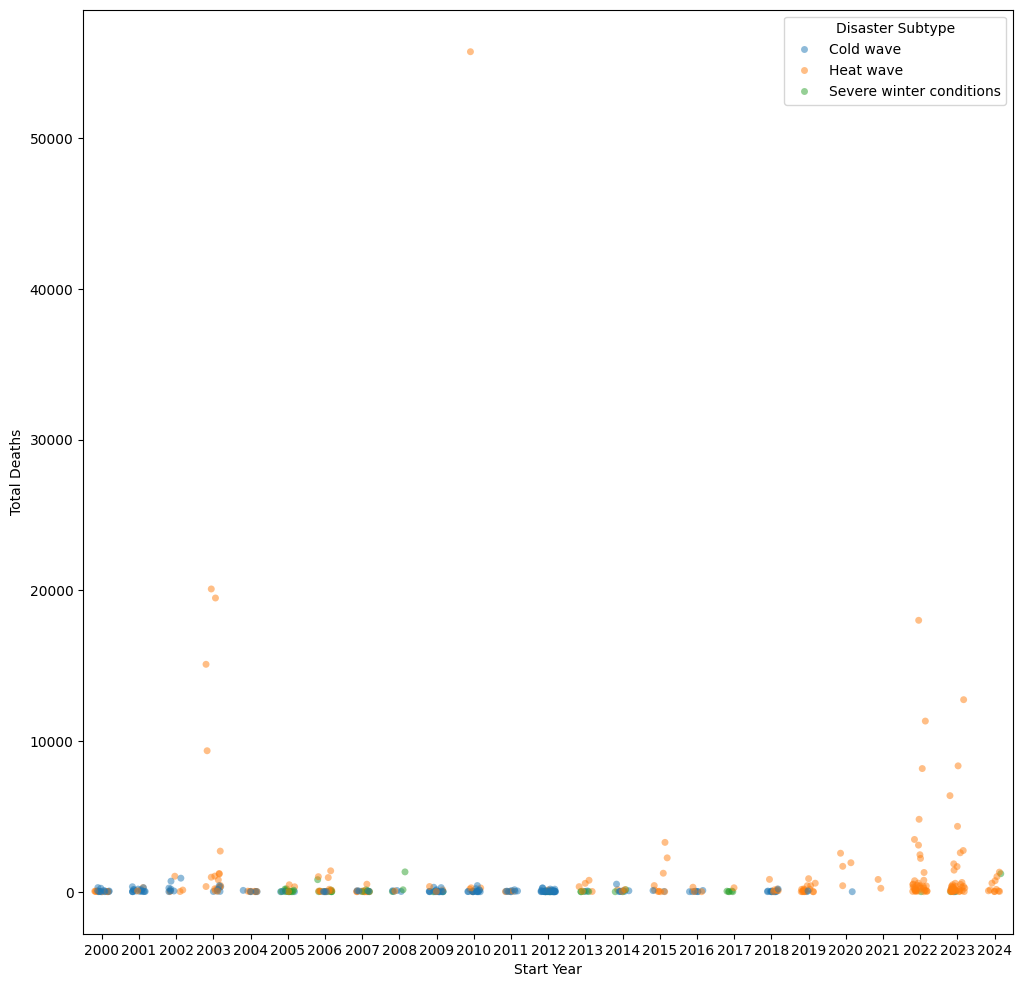

In [36]:
fig, ax = plt.subplots(figsize=(12,12))
sns.stripplot(data=df, x= 'Start Year', y= 'Total Deaths', hue= 'Disaster Subtype', alpha=0.5, jitter= 0.2, ax=ax);

In [37]:
df['Magnitude Scale'].value_counts()

Magnitude Scale
°C    535
Name: count, dtype: int64

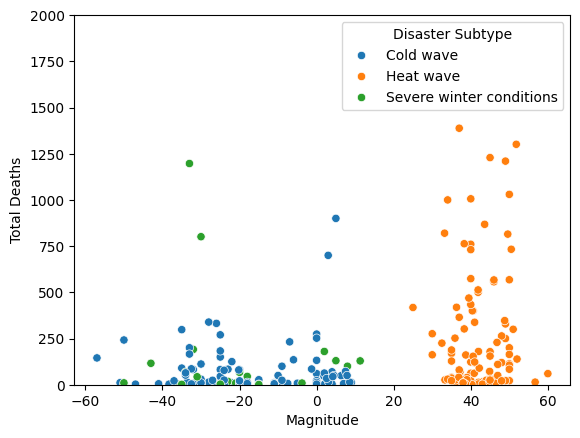

In [42]:
fig, ax = plt.subplots()

sns.scatterplot(data = df, x='Magnitude', y='Total Deaths', hue='Disaster Subtype')
ax.set_ylim(0,2_000);

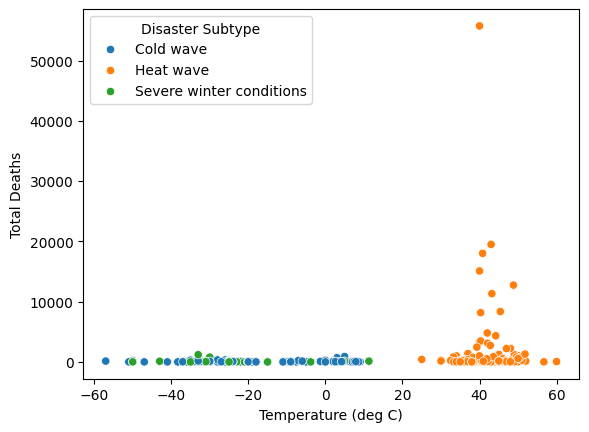

In [14]:
fig, ax = plt.subplots()

sns.scatterplot(data = df, x='Magnitude', y='Total Deaths', hue='Disaster Subtype')
ax.set_xlabel('Temperature (deg C)');

In [32]:
df_heat = df[df['Disaster Subtype'] == 'Heat wave']

In [16]:
fig, ax

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Temperature (deg C)', ylabel='Total Deaths'>)

In [34]:
df_heat.sort_values(by='Magnitude', ascending=False)[['DisNo.', 'Country', 'Location', 'Associated Types', 'Magnitude', 
                                                      'Magnitude Scale', 'Total Deaths', 'No. Injured', 'No. Affected', 
                                                      'No. Homeless', 'Total Affected'
                                                     ]].head(50)

,DisNo.,Country,Location,Associated Types,Magnitude,Magnitude Scale,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected
50,2002-0354-NGA,Nigeria,Maiduguri district (Borno province),NaN,60.0,°C,60.0,NaN,NaN,NaN,NaN
480,2023-0364-USA,United States of America,"Texas, Louisiana, Florida, Arizona, New Mexico...",Pollution,56.7,°C,14.0,NaN,NaN,NaN,NaN
521,2024-0246-PAK,Pakistan,Sindh,NaN,53.0,°C,NaN,NaN,NaN,NaN,NaN
525,2024-0275-PHL,Philippines,NaN,NaN,53.0,°C,NaN,34.0,NaN,NaN,34.0
327,2014-0010-AUS,Australia,"Western Australia, Victoria provinces",NaN,52.0,°C,139.0,NaN,NaN,NaN,NaN
529,2024-0415-SAU,Saudi Arabia,NaN,NaN,51.8,°C,1301.0,2764.0,NaN,NaN,2764.0
363,2016-0133-IND,India,"Andhra Pradesh, Rajasthan, Orissa, Bihar, Jhar...",NaN,51.0,°C,300.0,NaN,NaN,NaN,NaN
23,2000-0487-MAR,Morocco,"Settat district (Chaouia-Ouardigha province), ...",NaN,51.0,°C,NaN,NaN,NaN,NaN,NaN
520,2024-0246-IND,India,"New Delhi; Rajasthan, Bihar, Gujarat, West Raj...",NaN,50.5,°C,733.0,25000.0,NaN,NaN,25000.0
434,2022-0248-PAK,Pakistan,NaN,NaN,50.0,°C,NaN,NaN,NaN,NaN,NaN


In [35]:
df_heat['Region'].value_counts()

Region
Europe      141
Asia         74
Americas     16
Africa        8
Oceania       4
Name: count, dtype: int64

In [37]:
df_heat['Region'].value_counts(normalize=True)

Region
Europe      0.580247
Asia        0.304527
Americas    0.065844
Africa      0.032922
Oceania     0.016461
Name: proportion, dtype: float64

In [38]:
avg_temp = pd.read_csv('../data/raw/Avg_mon_surface_temp/average-monthly-surface-temperature.csv')

In [39]:
avg_temp.head()

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695


In [40]:
avg_temp.shape

(218538, 6)

In [41]:
avg_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218538 entries, 0 to 218537
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Entity                         218538 non-null  object 
 1   Code                           200070 non-null  object 
 2   year                           218538 non-null  int64  
 3   Day                            218538 non-null  object 
 4   Average surface temperature    218538 non-null  float64
 5   Average surface temperature.1  218538 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 10.0+ MB


In [42]:
avg_temp['Average surface temperature'].describe()

count    218538.000000
mean         17.449945
std          11.020415
min         -48.571213
25%          11.911662
50%          21.386195
75%          25.179820
max          39.889374
Name: Average surface temperature, dtype: float64

In [43]:
avg_temp.sort_values(by= 'Average surface temperature', ascending=False).head(20)

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1
110712,Kuwait,KWT,2017,2017-07-15,39.889374,26.966446
110760,Kuwait,KWT,2021,2021-07-15,39.877530,27.695848
110748,Kuwait,KWT,2020,2020-07-15,39.723476,26.944712
110485,Kuwait,KWT,1998,1998-08-15,39.472855,26.578620
110796,Kuwait,KWT,2024,2024-07-15,39.338510,27.049803
110689,Kuwait,KWT,2015,2015-08-15,39.288193,26.875237
110508,Kuwait,KWT,2000,2000-07-15,39.265503,26.024246
110784,Kuwait,KWT,2023,2023-07-15,39.227043,26.960167
110701,Kuwait,KWT,2016,2016-08-15,39.112950,26.777473
110688,Kuwait,KWT,2015,2015-07-15,39.058277,26.875237


In [8]:
em_data[em_data['Country']=='South Africa']

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
160,2007-0213-ZAF,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,ZAF,...,NaN,NaN,NaN,NaN,NaN,NaN,66.098103,"[{""adm1_code"":2708,""adm1_name"":""Gauteng""},{""ad...",2008-03-12,2023-09-25
361,2016-0036-ZAF,No,nat-met-ext-hea,Natural,Meteorological,Extreme temperature,Heat wave,NaN,NaN,ZAF,...,NaN,NaN,NaN,NaN,NaN,NaN,76.511216,"[{""adm2_code"":77347,""adm2_name"":""Ngaka Modiri ...",2016-02-15,2023-09-25
